In [1]:
import os
import json
import openfe
import time
from collections import defaultdict
from openfe import ChemicalSystem, ProteinComponent, SolventComponent
from perses.protocols import NonEquilibriumCyclingProtocol
from gufe import AlchemicalNetwork, tokenization
from alchemiscale import AlchemiscaleClient, Scope
from tqdm import tqdm  # progress bar

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!


In [2]:
user_id = os.environ['ALCHEMISCALE_ID']
user_key = os.environ['ALCHEMISCALE_KEY']
asc =  AlchemiscaleClient('https://api.alchemiscale.org', user_id, user_key)
asc.list_scopes()

[<Scope('choderalab-*-*')>]

In [3]:
scope = Scope('choderalab', 'plbenchmarks', 'tyk2_off2_1')

In [4]:
asc.query_networks()

[<ScopedKey('AlchemicalNetwork-0fae0c0c38cc97530d41176de64e4009-choderalab-neq_protocol_test-tyk2_off2_0')>,
 <ScopedKey('AlchemicalNetwork-c074dfc6b1833d5e0887f73b74afd843-choderalab-neq_protocol_test-tyk2_off2_0')>,
 <ScopedKey('AlchemicalNetwork-84219521c42c8b747f76c12dda78855a-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('AlchemicalNetwork-84d46b07118746638f02b7f8fb2d3cf9-choderalab-plbenchmarks-tyk2_off2_1')>]

In [5]:
network_sk_perses_prod = asc.query_networks()[-1]
network_production = asc.get_network(network_sk_perses_prod)

Output()

In [6]:
network_production

<AlchemicalNetwork-84d46b07118746638f02b7f8fb2d3cf9>

In [10]:
# Poll transformation status
transformation_sks_list = []
for transformation in network_production.edges:
    transform_sk = asc.get_scoped_key(transformation, scope)
    transformation_sks_list.append(transform_sk)
    asc.get_transformation_status(transform_sk)

Transformation-9f0165b5f2aa78ee63b0dfe3c6706b99-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-67edd5cb149e13700318019e0cd67bc0-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-b818b45312e1b52f6bf4c7f6c1757608-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-0ebd995688c627e7611f8157a41cd25d-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-efc555ce63decebcc7e52f892a7dd4c0-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-fe3e95784bc7e363fadce9660b59b125-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-79cd1315d18223cd12616f41eab622e7-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-b8f036a1b70da3db999681fcc2ab5d62-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-c77acd87707a7872b0016a45aa3dae6a-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-631eaa5e3e6f259508aeb3afc5dd805c-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-bab57e48b73731c770739d1bfb517608-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-3304c448e3b360a835f9e16ed86898eb-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-20e8d7060b866c80ed752081f80f8711-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-18677a68582e8c2945b6882c2d7b7cef-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-60e4018101a988b7b0202b2a78796a43-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-12e3f2122ac232e91497011db52ae0f4-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-69a27e119f0f49001e3edf89e2aeaf9d-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-e1de0c75a7b5450c526b9441a03bfab1-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-20b8148249890c1359df500ba6d07902-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-bf2c4c5ac2d3d49fdb6eb0ff531802e4-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-9ab1c52b1faee90226e2862a9c439648-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-74212c2fabc7b53269f7d1abdd20fdb1-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            1 │
│ waiting                                                          │                                           99 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-d8d48fa223cef5d42f05d61ef2f31ec9-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

Transformation-3ea5ee3433bb0e317dd4b1b78c919e5b-choderalab-plbenchmarks-tyk2_off2_1                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ status                                                           ┃                                        count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ complete                                                         │                                            0 │
│ running                                                          │                                            0 │
│ waiting                                                          │                                          100 │
│ error                                                            │                                            0 │
│ invalid                                                          │                                            0 │
│ deleted                                                          │                                            0 │
└──────────────────────────────────────────────────────────────────┴──────────────────────────────────────────────┘

In [49]:
# Cancel all tasks from network (if needd)
asc.cancel_tasks(tasks=asc.get_network_tasks(network_sk_perses_prod), network=network_sk_perses_prod)

[<ScopedKey('Task-6e1de6cdc7e94850930fc5dbb058d9de-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-83c1d586f1eb4602bb128fd450e0b710-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-8e302222a01c4ca596a6c6a7a3d36727-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-fe2cb53545474c9eb238a4a0da6d8572-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-83dfb692760e4aea97344c68f7610292-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-e41592c33a2e425abfdfa724fc95daa1-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-5a35ee2a8cee45898d00f3b46bf967f8-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-af0536d3f96748b89610e0d43e1e4b4e-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-227dd80225bf4a4fbac58781f99cc133-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-6061af5e221f4051bdb9d1a2691350ef-choderalab-plbenchmarks-tyk2_off2_1')>,
 <ScopedKey('Task-b85542d5bb2342fd8978545172bb6f4c-choderalab-plbenchmarks-tyk2_off2_1')>,

## If things ran succesfully
The following cells gather results and produce a binding FE estimate

In [7]:
# extract gathered dag results for single transformation
transformation_sk = "Transformation-19193b855bf3b68ef4b6b0b1c52a2fbc-choderalab-neq_protocol_test-tyk2_off2_0"
protocol_result = asc.get_transformation_results(transformation_sk)

In [10]:
%%time
# Extract another gathere results
transformation_sk = "Transformation-6f6c58eebe4d7ce2ce0b37408aab130a-choderalab-neq_protocol_test-tyk2_off2_0"
protocol_result = asc.get_transformation_results(transformation_sk)

CPU times: user 5.9 s, sys: 72.8 ms, total: 5.97 s
Wall time: 24 s


In [8]:
protocol_result.get_estimate()

-38.61469649105796 <Unit('kilocalorie / mole')>

In [9]:
protocol_result.get_uncertainty()

0.0440638814566767 <Unit('kilocalorie / mole')>

In [ ]:
# Extract all the dag results from a transformation
protocol_result = asc.get_transformation_results(transformation_sk, return_protocoldagresults=True)

In [13]:
transformation

Transformation(stateA=ChemicalSystem(name=, components={'ligand': SmallMoleculeComponent(name=lig_ejm_46), 'solvent': SolventComponent(name=O, Na+, Cl-)}), stateB=ChemicalSystem(name=, components={'ligand': SmallMoleculeComponent(name=lig_jmc_28), 'solvent': SolventComponent(name=O, Na+, Cl-)}), protocol=<NonEquilibriumCyclingProtocol-d9cd93268f9c613c82a83d897ca50c64>)

In [20]:
protocol_result

<NonEquilibriumCyclingProtocolResult-f18fe2c5ffceefe04d85df90ba051cd9>

In [8]:
# Extract all the results from all transformations and divide into phases

# Helper functions
def infer_phase(system: ChemicalSystem):
    """Infers the phase (vacuum, solvent, complex) according to the 
    components in the given system"""
    comps = system.components.values()
    if any([isinstance(comp, ProteinComponent) for comp in comps]):
        return "complex"
    elif any([isinstance(comp, SolventComponent) for comp in comps]):
        return "solvent"
    else:
        return "vacuum"

def create_arsenic_csv(results_dict, filename="arsenic_calculated.csv"):
    """Generates calculated part of arsenic csv file"""
    import numpy as np
    with open(filename, 'w') as arsenic_out:
        arsenic_out.write("edge,estimate(kcal/mol), error(kcal/mol)\n")
        for transformation_str, phase_results in results_dict.items():
            complex_fe = phase_results['complex'].get_estimate()
            solvent_fe = phase_results['solvent'].get_estimate()
            complex_error = phase_results['complex'].get_uncertainty()
            solvent_error = phase_results['solvent'].get_uncertainty()
            rel_fe_estimate = complex_fe - solvent_fe
            rel_fe_error = np.sqrt(complex_error**2 + solvent_error**2)
            # write string to file
            arsenic_out.write(f"{transformation_str},{rel_fe_estimate:.2f}, {rel_fe_error:.2f}\n")
    
    

In [ ]:
results_dict = defaultdict(dict)
for transformation in tqdm(network_production.edges):
    time_start = time.perf_counter()
    scope_key = asc.get_scoped_key(transformation, scope)
    result = asc.get_transformation_results(scope_key)
    time_stop = time.perf_counter()
    print(f"time in seconds getting transformation results: {time_stop - time_start}")
    run_phase = infer_phase(transformation.stateA)
    mapping = transformation.mapping['ligand']
    name_a = mapping.componentA.name
    name_b = mapping.componentB.name
    
    # store in data dictionary
    results_dict[f"{name_a}_{name_b}"][run_phase] = result
    
# generate csv to use with arsenic
create_arsenic_csv(results_dict)

In [20]:
results_dict

defaultdict(dict,
            {'lig_ejm_46_lig_jmc_23': {'complex': <NonEquilibriumCyclingProtocolResult-42e597ffb312a6faf1b006c5d427ec93>,
              'solvent': <NonEquilibriumCyclingProtocolResult-356bf65861538afe9c13f98b9888193d>},
             'lig_ejm_46_lig_jmc_27': {'complex': <NonEquilibriumCyclingProtocolResult-a6e3ea25f41d6b28314c6182f449709b>,
              'solvent': <NonEquilibriumCyclingProtocolResult-af0abfc9bca6d8116cb652e69ba03add>},
             'lig_ejm_31_lig_ejm_54': {'solvent': <NonEquilibriumCyclingProtocolResult-b379f3f8b7e2ffdd8d7e595a034a3a41>,
              'complex': <NonEquilibriumCyclingProtocolResult-275865d47342803c551dcdd24883b4ba>},
             'lig_ejm_31_lig_ejm_42': {'complex': <NonEquilibriumCyclingProtocolResult-3da0e39a200a9c67e8bb3f2bc5916481>,
              'solvent': <NonEquilibriumCyclingProtocolResult-e7cb92eb7973a7cdf23e104299ff33ab>},
             'lig_ejm_31_lig_ejm_55': {'solvent': <NonEquilibriumCyclingProtocolResult-4f2e343c39956fa

In [46]:
create_arsenic_csv(results_dict)

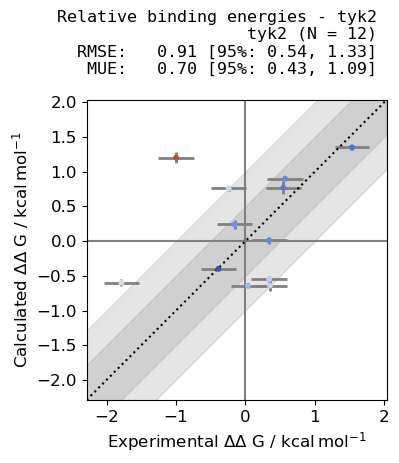

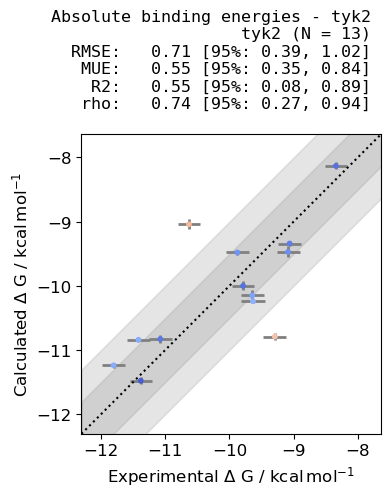

In [5]:
# Create arsenic plot
# Make plots and store
from openff.arsenic import plotting, wrangle
import numpy as np
csv_path = "tyk2_arsenic.csv"
target = "tyk2"
fe = wrangle.FEMap(csv_path)
# Relative plot
plotting.plot_DDGs(fe.graph,
                   target_name=f'{target}',
                   title=f'Relative binding energies - {target}',
                   figsize=5,
                   filename='./plot_relative.png'
                   )
# Absolute plot, with experimental data shifted to correct mean
experimental_mean_dg = np.asarray([node[1]["exp_DG"] for node in fe.graph.nodes(data=True)]).mean()
plotting.plot_DGs(fe.graph,
                  target_name=f'{target}',
                  title=f'Absolute binding energies - {target}',
                  figsize=5,
                  filename='./plot_absolute.png',
                  shift=experimental_mean_dg,
                  )

# Handling errors in transformations

In [ ]:
some_transformation = transformation_sks_list[0]
failed_protocol_dag_results = asc.get_transformation_failures(some_transformation)
for failure in failed_protocol_dag_results:
    for failed_unit in failure.protocol_unit_failures:
        print(failed_unit.exception)
        print(failed_unit.traceback)

# Debugging get transformations results times -- Ignore following cells

In [16]:
# Trying to get only the "solvent" transformations/tasks
for edge in tqdm(network_production.edges):
    phase = infer_phase(edge.stateA)
    if phase == "solvent":
        transform_results = asc.get_transformation_results(asc.get_scoped_key(edge, scope))
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [04:43<00:00, 11.81s/it]


In [39]:
asc.get_transformation(asc.get_scoped_key(edge, scope))

Transformation(stateA=ChemicalSystem(name=, components={'ligand': SmallMoleculeComponent(name=lig_ejm_46), 'solvent': SolventComponent(name=O, Na+, Cl-)}), stateB=ChemicalSystem(name=, components={'ligand': SmallMoleculeComponent(name=lig_jmc_28), 'solvent': SolventComponent(name=O, Na+, Cl-)}), protocol=<NonEquilibriumCyclingProtocol-d9cd93268f9c613c82a83d897ca50c64>)

In [40]:
edge

Transformation(stateA=ChemicalSystem(name=, components={'ligand': SmallMoleculeComponent(name=lig_ejm_46), 'solvent': SolventComponent(name=O, Na+, Cl-)}), stateB=ChemicalSystem(name=, components={'ligand': SmallMoleculeComponent(name=lig_jmc_28), 'solvent': SolventComponent(name=O, Na+, Cl-)}), protocol=<NonEquilibriumCyclingProtocol-d9cd93268f9c613c82a83d897ca50c64>)

In [5]:
# Extracting problematic edge
# we know it is lig_ejm_31_lig_ejm_54,1.20 kilocalorie / mole
for edge in network_production.edges:
    state_a_ligand = edge.stateA.components["ligand"]
    state_b_ligand = edge.stateB.components["ligand"]
    if state_a_ligand.name == "lig_ejm_31" and state_b_ligand.name == "lig_ejm_54":
        break

In [6]:
from perses.rjmc.atom_mapping import AtomMapper
atom_mapper = AtomMapper()
ligand_a = state_a_ligand.to_openff()
ligand_b = state_b_ligand.to_openff()
mapping = atom_mapper.get_best_mapping(ligand_a, ligand_b)
mapping


ValueError: Cannot construct openff.toolkit.topology.Molecule from <oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x7fc715cdbc30> >
No registered toolkits can provide the capability "from_object" for args "(<oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x7fc715cdbc30> >,)" and kwargs "{'allow_undefined_stereo': True, '_cls': <class 'openff.toolkit.topology.molecule.Molecule'>}"
Available toolkits are: [ToolkitWrapper around OpenEye Toolkit version 2022.2.2, ToolkitWrapper around The RDKit version 2022.09.1, ToolkitWrapper around AmberTools version 22.0, ToolkitWrapper around Built-in Toolkit version None]
 ToolkitWrapper around OpenEye Toolkit version 2022.2.2 <class 'openff.toolkit.utils.exceptions.RadicalsNotSupportedError'> : The OpenFF Toolkit does not currently support parsing molecules with radicals. Found 1 radical electrons on molecule [c]1[c][c]c([c][c]1)[C][N]c2[c][c]n[c][c]2.
 ToolkitWrapper around The RDKit version 2022.09.1 <class 'NotImplementedError'> : Cannot create Molecule from <class 'oechem.OEMol'> object


In [ ]:
# Pulling transformation with multiprocess
from multiprocessing import Pool, TimeoutError
import time
import os

def get_transformation_results(transformation, scope):
    transform_sk = asc.get_scoped_key(transformation, scope)
    transformation_sks_list.append(transform_sk)
    transf_results = asc.get_transformation_results(transform_sk)
    return transf_results

if __name__ == '__main__':
    # start 4 worker processes
    with Pool(processes=8) as pool:

        # print "[0, 1, 4,..., 81]"
        print(pool.map(f, range(10)))

        # print same numbers in arbitrary order
        for i in pool.imap_unordered(f, range(10)):
            print(i)

        # evaluate "f(20)" asynchronously
        res = pool.apply_async(f, (20,))      # runs in *only* one process
        print(res.get(timeout=1))             # prints "400"

        # evaluate "os.getpid()" asynchronously
        res = pool.apply_async(os.getpid, ()) # runs in *only* one process
        print(res.get(timeout=1))             # prints the PID of that process

        # launching multiple evaluations asynchronously *may* use more processes
        multiple_results = [pool.apply_async(os.getpid, ()) for i in range(4)]
        print([res.get(timeout=1) for res in multiple_results])

        # make a single worker sleep for 10 seconds
        res = pool.apply_async(time.sleep, (10,))
        try:
            print(res.get(timeout=1))
        except TimeoutError:
            print("We lacked patience and got a multiprocessing.TimeoutError")

        print("For the moment, the pool remains available for more work")

    # exiting the 'with'-block has stopped the pool
    print("Now the pool is closed and no longer available")